In [1]:
import os
import pandas as pd
import numpy as np
import anndata as ann
os.chdir('../spatialdm/')

In [2]:
from main import *
# from main_sparse import *
from plottings import *

In [3]:
# load anndata
os.chdir('datasets/')
from dataset import *
adata = melanoma()

/home/yoyo/miniconda2/envs/CC/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
raw = pd.DataFrame(adata.raw.X, index=adata.obs_names, columns=adata.var_names)
raw.head()

,PSME2,CUEDC1,RPLP1,TM9SF3,DEF8,RPL37A,NELL1,MFGE8,AIP,TSC22D3,...,TREM1,C2CD4A,TAF1L,PEBP4,BCL2L15,MYBPC2,RHOD,PPEF1,CKMT2,PGM5P2
1,2,0,21,0,0,28,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,13,0,0,13,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,13,0,0,15,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,18,0,1,17,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,10,0,0,3,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
log = pd.DataFrame(adata.X, index=adata.obs_names, columns=adata.var_names)
log.head()

,PSME2,CUEDC1,RPLP1,TM9SF3,DEF8,RPL37A,NELL1,MFGE8,AIP,TSC22D3,...,TREM1,C2CD4A,TAF1L,PEBP4,BCL2L15,MYBPC2,RHOD,PPEF1,CKMT2,PGM5P2
1,1.813059,0.000000,4.775871,0.0,0.000000,5.177683,1.813059,1.813059,1.174363,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,5.436410,0.0,0.000000,5.436410,0.000000,3.427919,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,5.330760,0.0,0.000000,5.532423,0.000000,2.815122,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,1.755626,5.452236,0.0,1.755626,5.371711,2.524428,3.023288,1.755626,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,5.327188,0.0,0.000000,3.671727,0.000000,3.142286,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
spatialcoord = pd.DataFrame(adata.obsm['spatial'], index=adata.obs_names, columns=['x','y'])
spatialcoord.head()

,x,y
1,15,7
2,16,7
3,17,7
4,18,7
5,13,8


In [ ]:
# # alternatively load via pandas
# datadir = '/home/yoyo/1_spatial/1_Tumor/data/'

# spatialcoord = pd.read_csv(datadir+'spatialcoord.csv', index_col=0)
# spatialcoord.columns = ['x', 'y']
# spatialcoord.head()

# exp=pd.read_csv(datadir + 'logcounts.csv',header=0,index_col=0)
# exp = exp.transpose()
# exp.index = spatialcoord.index
# exp.head()

## SpatialDM permutation approach

In [7]:
my_sample = SpatialDM(log, raw, spatialcoord)     # load spatial data

my_sample.weight_matrix(l=1.2, cutoff=0.2, single_cell=False) # weight_matrix by rbf kernel

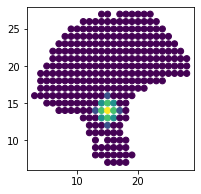

In [8]:
# visualize range of interaction
plt.figure(figsize=(3,3))
plt.scatter(my_sample.spatialcoord.x, my_sample.spatialcoord.y, c=my_sample.rbf_d[50])

In [9]:
my_sample.extract_lr('human', '/home/yoyo/1_spatial', min_cell=3)      # find overlapping LRs from CellChatDB

In [10]:
my_sample.spatialdm_global(1000, select_num=None, method='both',nproc=50)     # global Moran selection
my_sample.sig_pairs(method='permutation', fdr=True, threshold=0.1)     # select significant pairs

0 pairs global selection finished in: 0.30816173553466797
1 pairs global selection finished in: 0.2995164394378662
2 pairs global selection finished in: 0.29878997802734375
3 pairs global selection finished in: 0.2987041473388672
4 pairs global selection finished in: 0.29638028144836426
5 pairs global selection finished in: 0.2961888313293457
6 pairs global selection finished in: 0.3668067455291748
7 pairs global selection finished in: 0.30412817001342773
8 pairs global selection finished in: 0.30503106117248535
9 pairs global selection finished in: 0.2961890697479248
10 pairs global selection finished in: 0.29998779296875
11 pairs global selection finished in: 0.3621253967285156
12 pairs global selection finished in: 0.3061716556549072
13 pairs global selection finished in: 0.2983217239379883
14 pairs global selection finished in: 0.30261945724487305
15 pairs global selection finished in: 0.30612754821777344
16 pairs global selection finished in: 0.29567766189575195
17 pairs global se

140 pairs global selection finished in: 0.29225921630859375
141 pairs global selection finished in: 0.29607129096984863
142 pairs global selection finished in: 0.3034942150115967
143 pairs global selection finished in: 0.31668901443481445
144 pairs global selection finished in: 0.3330702781677246
145 pairs global selection finished in: 0.3840036392211914
146 pairs global selection finished in: 0.3138883113861084
147 pairs global selection finished in: 0.31401634216308594
148 pairs global selection finished in: 0.3114018440246582
149 pairs global selection finished in: 0.31372833251953125
150 pairs global selection finished in: 0.30886316299438477
151 pairs global selection finished in: 0.35939502716064453
152 pairs global selection finished in: 0.31131529808044434
153 pairs global selection finished in: 0.3106720447540283
154 pairs global selection finished in: 0.31231212615966797
155 pairs global selection finished in: 0.31581854820251465
156 pairs global selection finished in: 0.3235

278 pairs global selection finished in: 0.3166520595550537
279 pairs global selection finished in: 0.31302785873413086
280 pairs global selection finished in: 0.31453561782836914
281 pairs global selection finished in: 0.30919861793518066
282 pairs global selection finished in: 0.31273508071899414
283 pairs global selection finished in: 0.3107609748840332
284 pairs global selection finished in: 0.3150629997253418
285 pairs global selection finished in: 0.339524507522583
286 pairs global selection finished in: 0.3253333568572998
287 pairs global selection finished in: 0.3063619136810303
288 pairs global selection finished in: 0.30990076065063477
289 pairs global selection finished in: 0.3273050785064697
290 pairs global selection finished in: 0.3194093704223633
291 pairs global selection finished in: 0.36451029777526855
292 pairs global selection finished in: 0.323932409286499
293 pairs global selection finished in: 0.3189702033996582
294 pairs global selection finished in: 0.3227918148

417 pairs global selection finished in: 0.31618309020996094
418 pairs global selection finished in: 0.31996893882751465
419 pairs global selection finished in: 0.32164454460144043
420 pairs global selection finished in: 0.3583812713623047
421 pairs global selection finished in: 0.3185610771179199
422 pairs global selection finished in: 0.30883002281188965
423 pairs global selection finished in: 0.3002488613128662
424 pairs global selection finished in: 0.31293797492980957
425 pairs global selection finished in: 0.30817747116088867
426 pairs global selection finished in: 0.3772566318511963
427 pairs global selection finished in: 0.2840726375579834
428 pairs global selection finished in: 0.3293583393096924
429 pairs global selection finished in: 0.3220956325531006
430 pairs global selection finished in: 0.32719898223876953
431 pairs global selection finished in: 0.31043386459350586
432 pairs global selection finished in: 0.30609774589538574
433 pairs global selection finished in: 0.39040

555 pairs global selection finished in: 0.3216855525970459
556 pairs global selection finished in: 0.3756115436553955
557 pairs global selection finished in: 0.3698868751525879
558 pairs global selection finished in: 0.31957316398620605
559 pairs global selection finished in: 0.3519284725189209
560 pairs global selection finished in: 0.3190605640411377
561 pairs global selection finished in: 0.3273904323577881
562 pairs global selection finished in: 0.31996893882751465
563 pairs global selection finished in: 0.37288355827331543
564 pairs global selection finished in: 0.31848978996276855
565 pairs global selection finished in: 0.30831384658813477
566 pairs global selection finished in: 0.30844902992248535
567 pairs global selection finished in: 0.3098912239074707
568 pairs global selection finished in: 0.3086981773376465
569 pairs global selection finished in: 0.3078804016113281
570 pairs global selection finished in: 0.32276177406311035
571 pairs global selection finished in: 0.3591985

694 pairs global selection finished in: 0.3128049373626709
695 pairs global selection finished in: 0.31533217430114746
696 pairs global selection finished in: 0.31761956214904785
697 pairs global selection finished in: 0.31134486198425293
698 pairs global selection finished in: 0.31998610496520996
699 pairs global selection finished in: 0.38194847106933594
700 pairs global selection finished in: 0.3240625858306885
701 pairs global selection finished in: 0.31419897079467773
702 pairs global selection finished in: 0.32645153999328613
703 pairs global selection finished in: 0.32526612281799316
704 pairs global selection finished in: 0.33046483993530273
705 pairs global selection finished in: 0.3250620365142822
706 pairs global selection finished in: 0.3578016757965088
707 pairs global selection finished in: 0.3228311538696289
708 pairs global selection finished in: 0.3299074172973633
709 pairs global selection finished in: 0.31643009185791016
710 pairs global selection finished in: 0.3141

832 pairs global selection finished in: 0.3122408390045166
833 pairs global selection finished in: 0.3657088279724121
834 pairs global selection finished in: 0.3151590824127197
835 pairs global selection finished in: 0.3182716369628906
836 pairs global selection finished in: 0.32678794860839844
837 pairs global selection finished in: 0.33327674865722656
838 pairs global selection finished in: 0.3253822326660156
839 pairs global selection finished in: 0.3506910800933838
840 pairs global selection finished in: 0.321380615234375
841 pairs global selection finished in: 0.31665515899658203
842 pairs global selection finished in: 0.3060002326965332
843 pairs global selection finished in: 0.3082773685455322
844 pairs global selection finished in: 0.3121640682220459
845 pairs global selection finished in: 0.3208200931549072
846 pairs global selection finished in: 0.31775736808776855
847 pairs global selection finished in: 0.4114997386932373
848 pairs global selection finished in: 0.32577490806

In [11]:
my_sample.spatialdm_local(n_perm=1000, method='permutation', select_num=None, nproc=50)     # local spot selection
my_sample.sig_spots(method='permutation', fdr=False, threshold=0.1)     # significant local spots

/home/yoyo/1_spatial/1_Tumor/git_rep/SpatialDM/spatialdm/main.py:231: RuntimeWarning: invalid value encountered in true_divide
  self.pos[k] = (abs(x) / x + abs(y) / y) / 2


1pairs local selection finished in 35.606257915496826
2pairs local selection finished in 35.41663146018982
3pairs local selection finished in 34.385725259780884
4pairs local selection finished in 33.28000998497009
5pairs local selection finished in 33.37447953224182
6pairs local selection finished in 34.962064266204834
7pairs local selection finished in 30.314751386642456
8pairs local selection finished in 33.24699902534485
9pairs local selection finished in 32.020463705062866
10pairs local selection finished in 35.03244400024414
11pairs local selection finished in 33.07653832435608
12pairs local selection finished in 35.50513052940369
13pairs local selection finished in 33.2677001953125
14pairs local selection finished in 33.74404740333557
15pairs local selection finished in 34.30675792694092
16pairs local selection finished in 34.63810729980469
17pairs local selection finished in 33.82741403579712
18pairs local selection finished in 32.058258295059204
19pairs local selection finished

In [12]:
my_sample.global_res.selected.sum()

123

In [ ]:
data_dir='/home/yoyo/1_spatial/1_Tumor/git_rep/SpatialDM/tutorial/output/'
my_sample.save_spataildm(data_dir)
my_sample = read_spataildm(data_dir)

## Visualize pair(s)

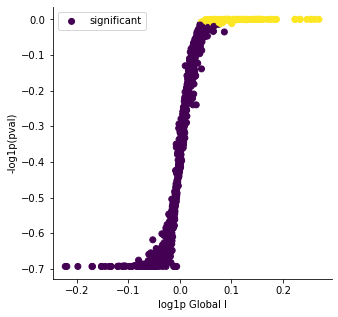

In [21]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(np.log1p(my_sample.global_I), -np.log1p(my_sample.global_res.perm_pval), c =my_sample.global_res.selected)
plt.xlabel('log1p Global I')
plt.ylabel('-log1p(pval)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(['significant'], loc='upper left')

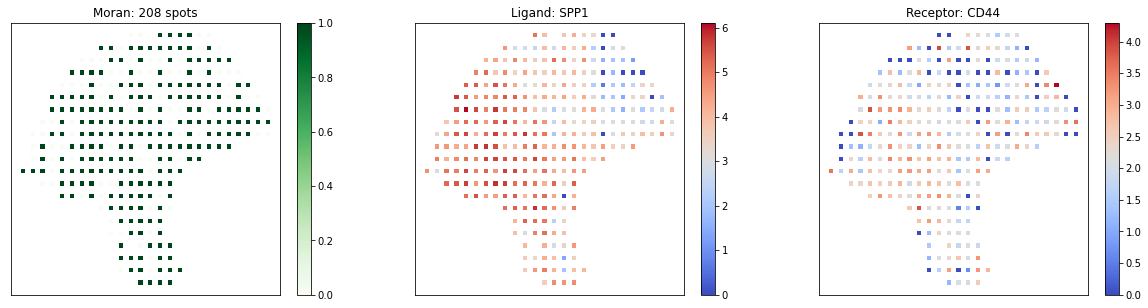

In [22]:
plot_pairs(my_sample, ['SPP1_CD44'])

## Spatial Clustering of Local Spots

In [23]:
import NaiveDE
import SpatialDE

In [24]:
# SpatialDE code
bin_spots = my_sample.selected_spots.astype(int)[my_sample.n_spots>2]

results = SpatialDE.run(my_sample.spatialcoord, bin_spots.transpose())

histology_results, patterns = SpatialDE.aeh.spatial_patterns(my_sample.spatialcoord, bin_spots.transpose(),
                                                             results, C=6, l=3,
                                                             verbosity=1)

/home/yoyo/miniconda2/envs/CC/lib/python3.9/site-packages/SpatialDE/base.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])
/home/yoyo/miniconda2/envs/CC/lib/python3.9/site-packages/SpatialDE/base.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

iter 0, ELBO: -6.47e+10
iter 1, ELBO: -3.13e+10, delta_ELBO: 3.34e+10
iter 2, ELBO: -3.13e+10, delta_ELBO: 5.18e+03
iter 3, ELBO: -3.13e+10, delta_ELBO: 1.32e+03
iter 4, ELBO: -3.13e+10, delta_ELBO: 1.54e+02
iter 5, ELBO: -3.13e+10, delta_ELBO: 3.22e+01
iter 6, ELBO: -3.13e+10, delta_ELBO: 7.14e+00
iter 7, ELBO: -3.13e+10, delta_ELBO: 1.38e+00
iter 8, ELBO: -3.13e+10, delta_ELBO: 6.20e+00
iter 9, ELBO: -3.13e+10, delta_ELBO: 1.68e-01
iter 10, ELBO: -3.13e+10, delta_ELBO: 3.22e+00
iter 11, ELBO: -3.13e+10, delta_ELBO: 3.61e-01
iter 12, ELBO: -3.13e+10, delta_ELBO: 9.62e+00
iter 13, ELBO: -3.13e+10, delta_ELBO: 1.21e+01
iter 14, ELBO: -3.13e+10, delta_ELBO: 1.43e+00
iter 15, ELBO: -3.13e+10, delta_ELBO: 1.16e+00
iter 16, ELBO: -3.13e+10, delta_ELBO: 7.82e+00
iter 17, ELBO: -3.13e+10, delta_ELBO: 2.93e-02
iter 18, ELBO: -3.13e+10, delta_ELBO: 1.60e+00
iter 19, ELBO: -3.13e+10, delta_ELBO: 8.06e-01
iter 20, ELBO: -3.13e+10, delta_ELBO: 3.99e-01
iter 21, ELBO: -3.13e+10, delta_ELBO: 9.43e-0

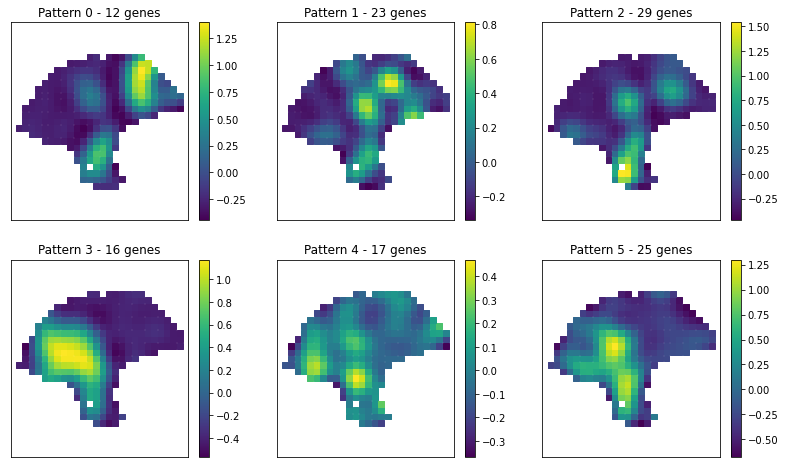

In [25]:
plt.figure(figsize=(18/4*3,8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.scatter(my_sample.spatialcoord['x'], my_sample.spatialcoord['y'], marker = 's',c=patterns[i], s=35);
    plt.axis('equal')
    plt_util('Pattern {} - {} genes'.format(i, histology_results.query('pattern == @i').shape[0] ))
#     plt.colorbar(ticks=[])
    plt.savefig('SpatialDE_patterns.pdf') #2 # new dfb


In [26]:
dic=dict()
for i in histology_results.sort_values('pattern').pattern.unique():
    dic['Pattern_{}'.format(i)]=histology_results.query('pattern == @i').sort_values('membership')['g'].values

In [28]:
compute_pathway(my_sample, dic=dic)

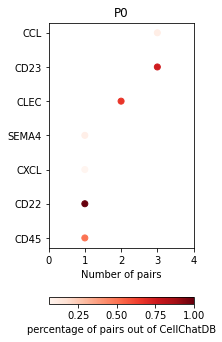

In [31]:
dot_path(my_sample, 'P0', pdf='P0')

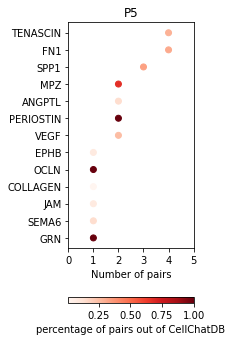

In [33]:
dot_path(my_sample, 'P5', pdf='P5')

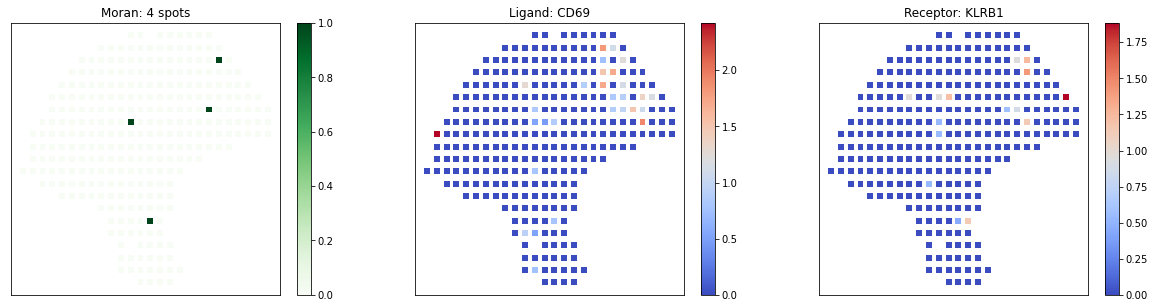

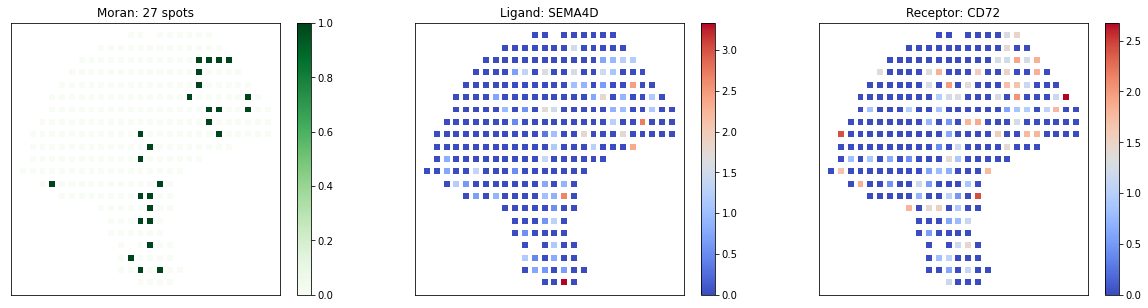

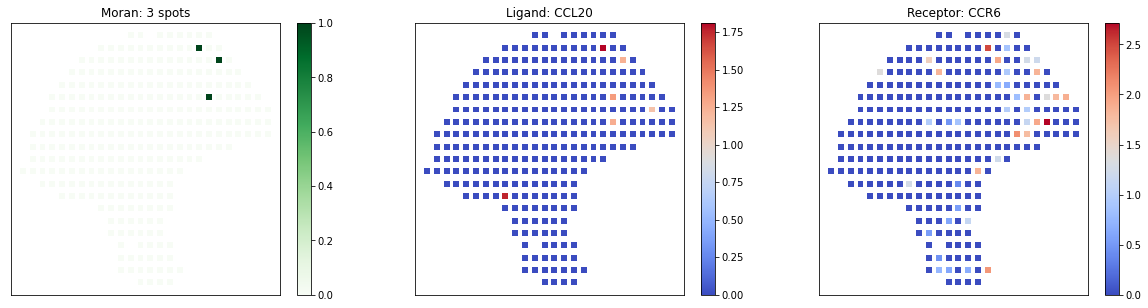

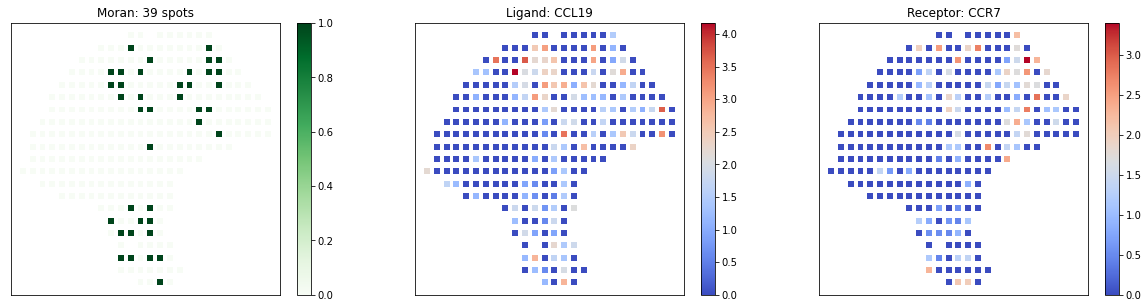

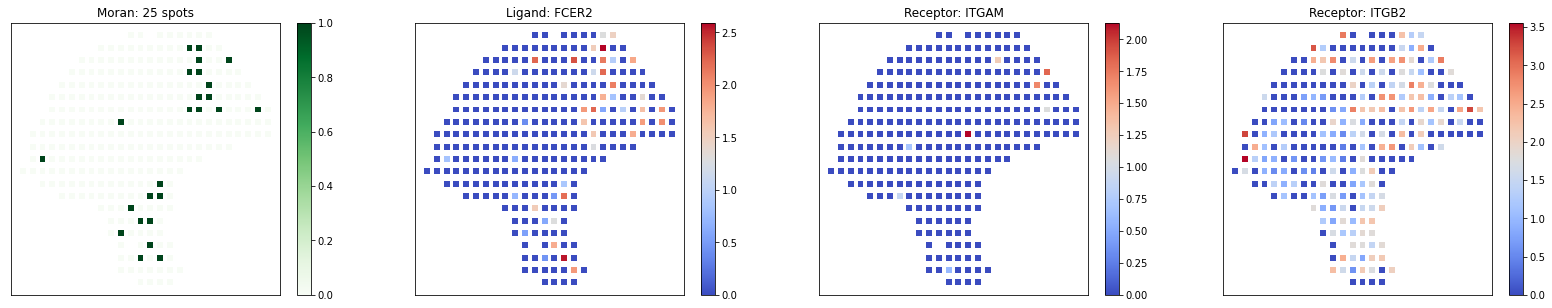

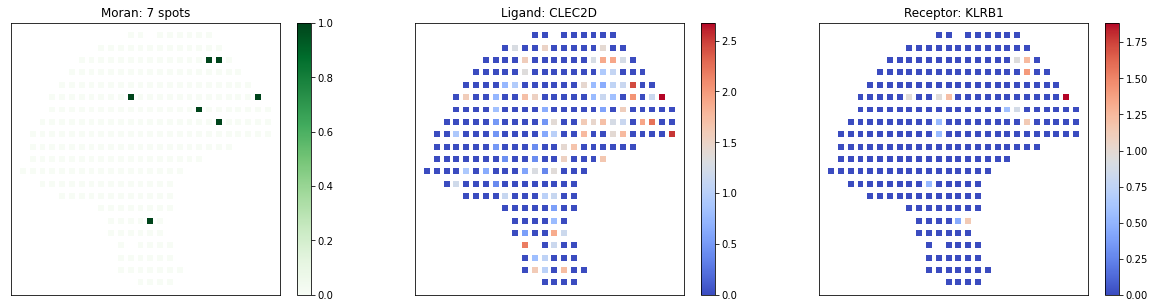

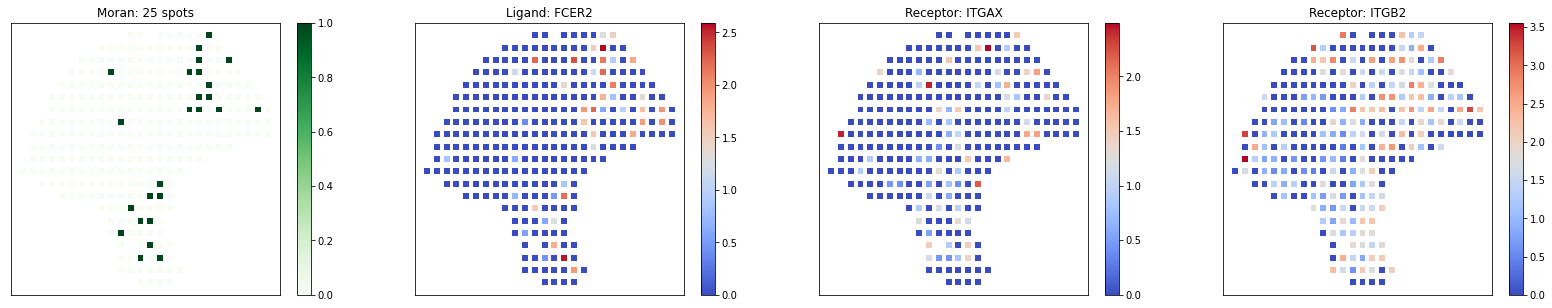

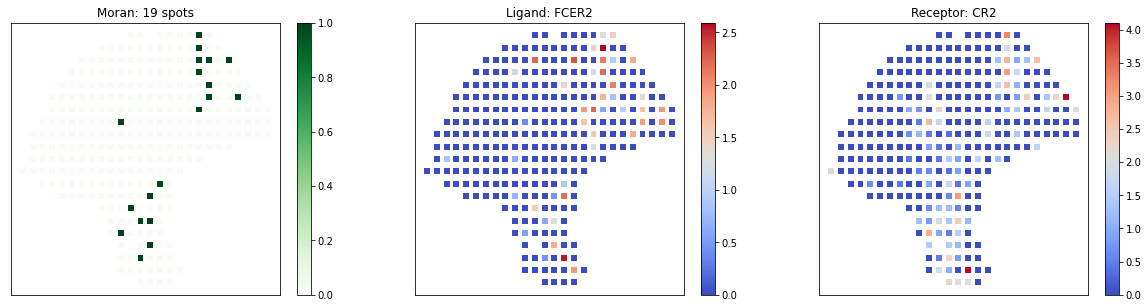

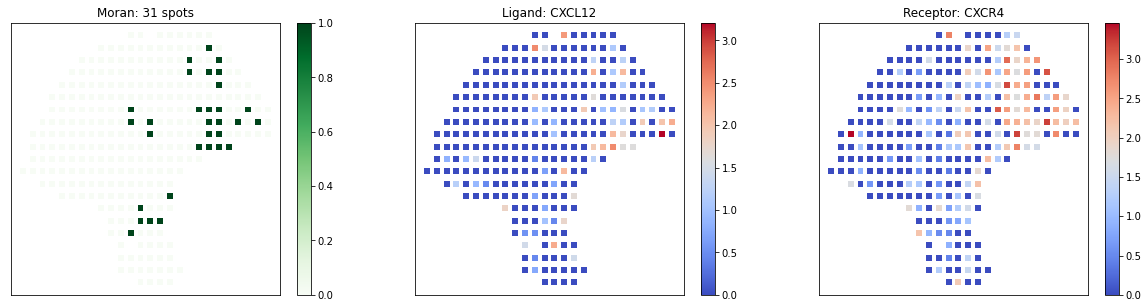

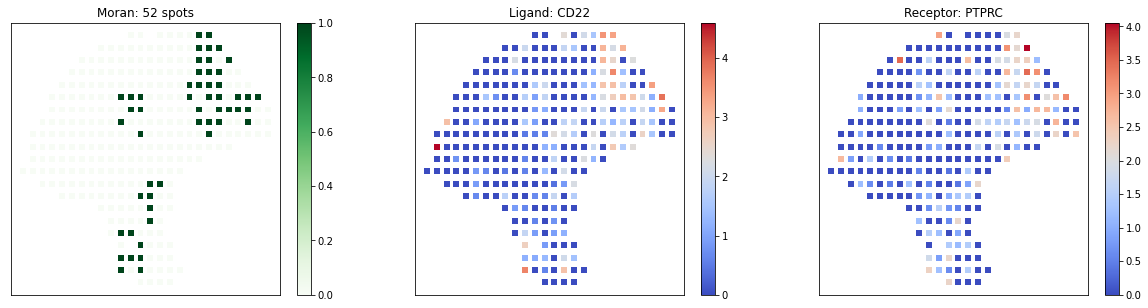

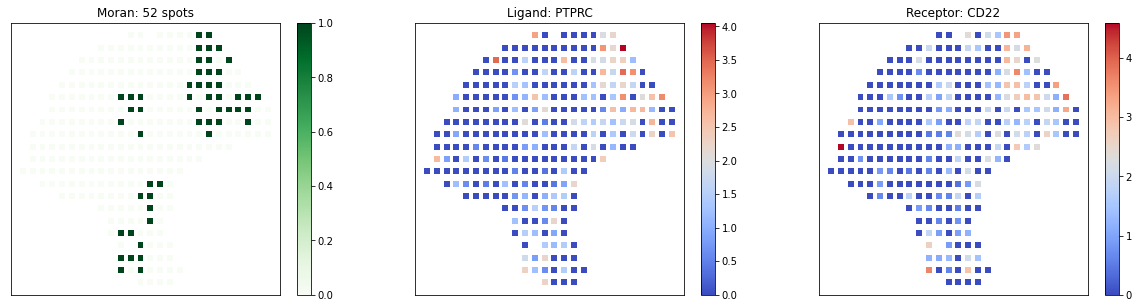

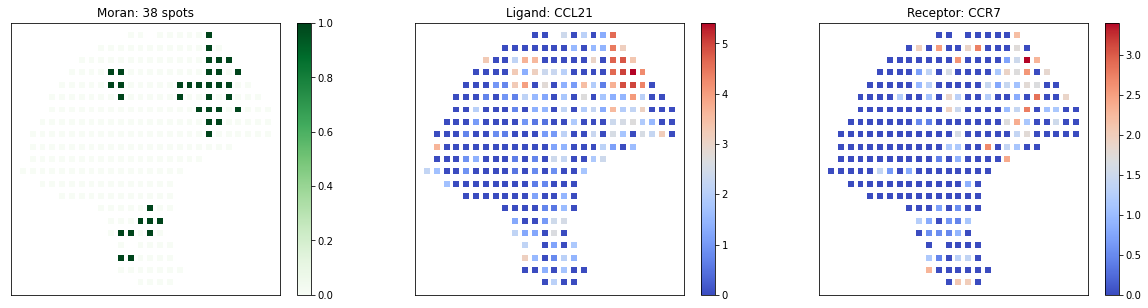

In [35]:
# visualize pattern 2 pairs
plot_pairs(my_sample, dic['Pattern_0'], pdf='P0pairs', markersize=35)

## permutation-zscore consistency

In [46]:
x = -np.log10(my_sample.global_res.z_pval.values)
y = -np.log10(my_sample.global_res.perm_pval)

/home/yoyo/miniconda2/envs/CC/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


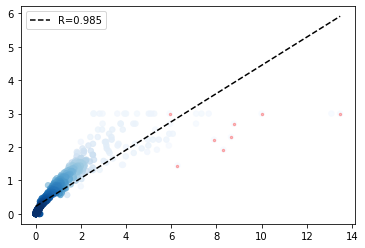

In [47]:
x = x[~np.isinf(y)]
y = y[~np.isinf(y)]
# x = np.where(x>3, 3, x)
# y = np.where(np.isinf(y), 3, y)
corr_plot(x, y, method='spearman')
# plt.savefig('global_corr.pdf')

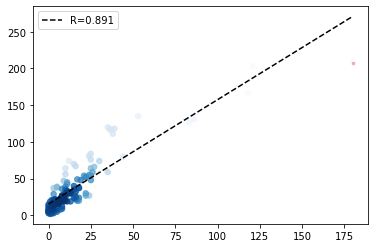

In [58]:
x=(my_sample2.local_z_p<0.1).sum(1).values
y=(my_sample.local_perm_p<0.1).sum(1).values
corr_plot(x, y, method='pearson')
# plt.savefig('local_corr.pdf')

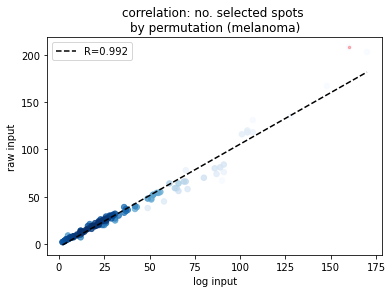

In [302]:
# Consistency between raw input & log input (local)
# corr_plot((my_sample.local_perm_p[id_log.isin(id_raw)]<0.1).sum(1).values, 
#             (raw_sample.local_perm_p[id_raw.isin(id_log)]<0.1).sum(1))
# plt.title('correlation: no. selected spots \nby permutation (melanoma)')
# plt.xlabel('log input')
# plt.ylabel('raw input')